## Bloch Sphere Visualization in CUDA-Q using QuTiP for Single Qubit Operations 

To expand the visualization functionality in the CUDA-Q to include the Bloch Sphere Visualization for the single qubit state vectors , We have following five steps :

(1) Makesure for QuTiP Installation  
(2) Add function to Plot State Vector  
(3) Multiple Bloch Spheres Support  
(4) Integration with the jupyter notebook  
(5) Apply it to the cudaq 

### Step-1 QuTip Installation 

In [1]:
def check_qutip_installed():
    try:
        import qutip
    except ImportError:
        raise ImportError("QuTiP is not installed. Install it using 'pip install qutip' to use this feature.")


### Step-2 Add function to Plot State Vector 

We'll add the add_to_bloch_sphere function to the cudaq.State class. This function will create a new Bloch sphere or add the state vector to an existing Bloch sphere if provided : 

In [2]:
import numpy as np
from qutip import Bloch, Qobj

def check_qutip_installed():
    try:
        import qutip
    except ImportError:
        raise ImportError("QuTiP is not installed. Please install it using pip.")
        
class State:
    def __init__(self, statevector):
        self.statevector = np.array(statevector)
        if len(self.statevector) != 2:
            raise ValueError("The state is not a single qubit state.")    
    def get_bloch_vector(self):
        state = Qobj(self.statevector)
        return [
            np.real(state[1, 0] * np.conjugate(state[0, 0])),
            np.imag(state[1, 0] * np.conjugate(state[0, 0])),
            np.real(state[0, 0] * np.conjugate(state[0, 0])) - np.real(state[1, 0] * np.conjugate(state[1, 0]))
        ]
    def add_to_bloch_sphere(self, bloch_sphere=None):
        check_qutip_installed()
        bloch_sphere = bloch_sphere or Bloch()
        bloch_sphere.add_vectors(self.get_bloch_vector())
        return bloch_sphere
def add_states_to_bloch_sphere(states, bloch_sphere=None):
    check_qutip_installed()
    bloch_sphere = bloch_sphere or Bloch()
    for state in states:
        bloch_sphere.add_vectors(state.get_bloch_vector())
    return bloch_sphere

        

### Step-3 Multiple Bloch Spheres and single Bloch with multiple states 

Create a function to create multiple Bloch Spheres side by side and single bloch with multiple states : 

In [3]:
import matplotlib.pyplot as plt

def show(*bloch_spheres):
    n = len(bloch_spheres)
    if n == 0:
        raise ValueError("No Bloch spheres to show.")
    
    fig, axes = plt.subplots(1, n, subplot_kw={'projection': '3d'}, figsize=(5 * n, 5))
    
    if n == 1:
        bloch_spheres[0].fig = fig
        bloch_spheres[0].axes = axes
        bloch_spheres[0].render()
    else:
        for i, bloch_sphere in enumerate(bloch_spheres):
            bloch_sphere.fig = fig
            bloch_sphere.axes = axes[i]
            bloch_sphere.render()

    plt.show()


### Step-4 Integration with jupyter notebook 

Ensure that the visualizations are correctly rendered in Jupyter notebooks. This is inherently supported by Matplotlib, which QuTiP uses for plotting.

#### Examples  
Usecase - 1 :

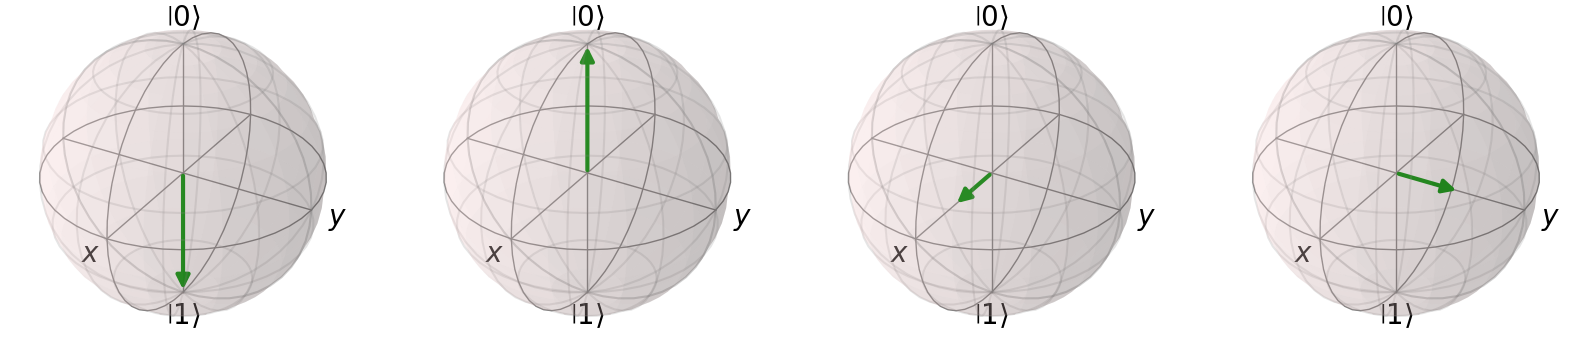

In [4]:
# Example 
import numpy as np

# Example statevector
statevector1 = np.array([0,1])
statevector2=np.array([1,0])
statevector3=np.array([1/np.sqrt(2),1/np.sqrt(2)])
statevector4 = np.array([1/np.sqrt(2), 1/np.sqrt(2) * 1j])

# Create a State object
states1= State(statevector1)
states2= State(statevector2)
states3= State(statevector3)
states4= State(statevector4)

# Plot on a Bloch sphere
bloch_sphere1= states1.add_to_bloch_sphere()
bloch_sphere2= states2.add_to_bloch_sphere()
bloch_sphere3= states3.add_to_bloch_sphere()
bloch_sphere4= states4.add_to_bloch_sphere()

# Display the Bloch sphere
show(bloch_sphere1,bloch_sphere2,bloch_sphere3,bloch_sphere4)


Usecase 2 : use add_states_to_bloch_sphere() fucntion : 

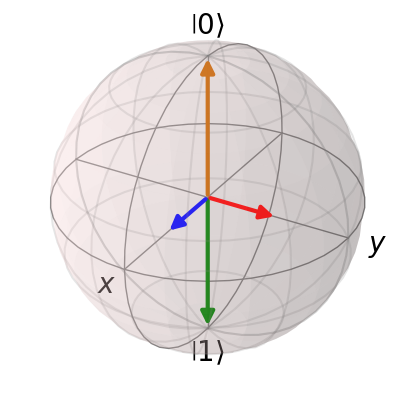

In [36]:
state_s=[states1,states2,states3,states4]
blochs=add_states_to_bloch_sphere(state_s)
show(blochs)

### Step-5 Apply it to the cudaq

In [38]:
import cudaq
kernelx = cudaq.make_kernel()
kernelz = cudaq.make_kernel()

qx = kernelx.qalloc(1)
qz = kernelz.qalloc(1)
kernelx.x(qx)
kernelz.z(qz)
x_state = cudaq.get_state(kernelx)
z_state = cudaq.get_state(kernelz)


Usecase 1 : Draw Multiple Bloch Spheres side by side

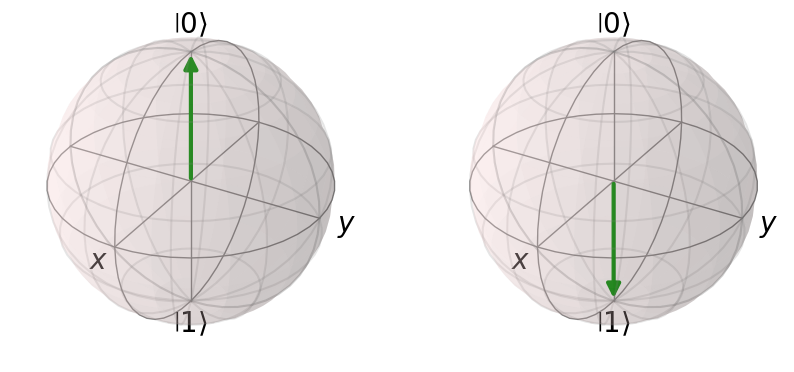

In [40]:
statevectorx = x_state  
statex = State(statevectorx)
bloch_spherex = statex.add_to_bloch_sphere()
statevectorz = z_state 
statez = State(statevectorz)
bloch_spherez = statez.add_to_bloch_sphere()
show(bloch_spherez,bloch_spherex)

Usecase 2 : Draw Multiple states in single Bloch Sphere 

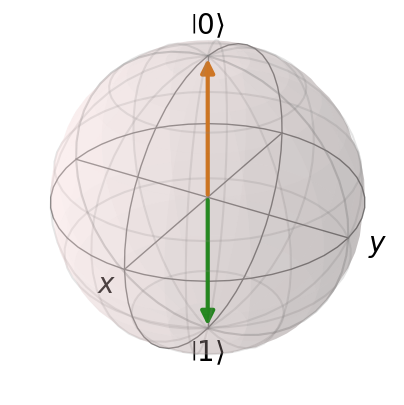

In [43]:
states = [State(statevectorx),State(statevectorz)]
bloch_spheres = add_states_to_bloch_sphere(states)
show(bloch_spheres)